In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd

warnings.filterwarnings("ignore")
plt.style.use('seaborn')

In [2]:
def compare_cdf(x, data_type, simulation_size, alpha=0.1):
    #############################
    # Figure 1 - Characteristics
    #############################
    fig, axes = plt.subplots(figsize=(8*2, 6*2), nrows=2, ncols=2)
    ax1, ax2, ax3, ax4 = axes.flatten()
    
    n = len(x)
    x_empcdf, y_empcdf = np.sort(x), np.array([i/n for i in range(1, n + 1)])
    y_cdf = np.interp(x, x_empcdf, y_empcdf)
    x_empcdf2, y_empcdf2 = np.sort(y_cdf), np.array([i/n for i in range(1, n + 1)])
    y_cdf2 = np.interp(y_cdf, x_empcdf2, y_empcdf2)
    
    fig.suptitle('{} Distribution with {} Samples'.format(data_type, n), fontsize=20, y=0.94)
    
    ax = ax1
    sns.distplot(x, ax=ax)
    ax.set_title('Histogram of X')

    ax = ax2
    sns.lineplot(x=x_empcdf, y=y_empcdf, marker="o", ax=ax, color='green', markeredgewidth=0, alpha=alpha)
    for px, py in zip(x_empcdf, y_empcdf):
        ax.hlines(py, x_empcdf[0], px, colors='brown', linestyle='--', linewidth=0.5)
    ax.set_title('Emperical Distribution of X')  
    
    ax = ax3
    sns.distplot(y_cdf, ax=ax)
    ax.set_title('Histogram of (Discrete CDF of X)')
    
    ax = ax4
    sns.lineplot(x=y_cdf, y=y_cdf2, marker="o", ax=ax, color='red', markeredgewidth=0, alpha=alpha)
    ax.set_title('Discrete CDF of (Discrete CDF of X)')
    
    plt.show()
    
    ########################
    # Figure 2 - Simulation
    ########################
    fig, axes = plt.subplots(figsize=(8 * 2, 6), nrows=1, ncols=2)
    ax1, ax2 = axes.flatten()
    
    fig.suptitle('Simulation with {:,} Samples'.format(simulation_size), fontsize=20, y=0.99)
    
    uniform_x = np.random.uniform(size=simulation_size)
    new_x = np.interp(uniform_x, y_empcdf, x_empcdf) #Calculate F_inv(u)
    n = len(new_x)
    new_x_empcdf, new_y_empcdf = np.sort(new_x), np.array([i/n for i in range(1, n + 1)])
    
    ax = ax1
    sns.distplot(new_x, ax=ax)
    ax.set_title('Histogram of Simulated Samples')

    ax = ax2
    sns.lineplot(x=new_x_empcdf, y=new_y_empcdf, marker="o", ax=ax, color='green', markeredgewidth=0, alpha=alpha)
    ax.set_title('Emperical Distribution of Simulated Samples')
    
    plt.show()

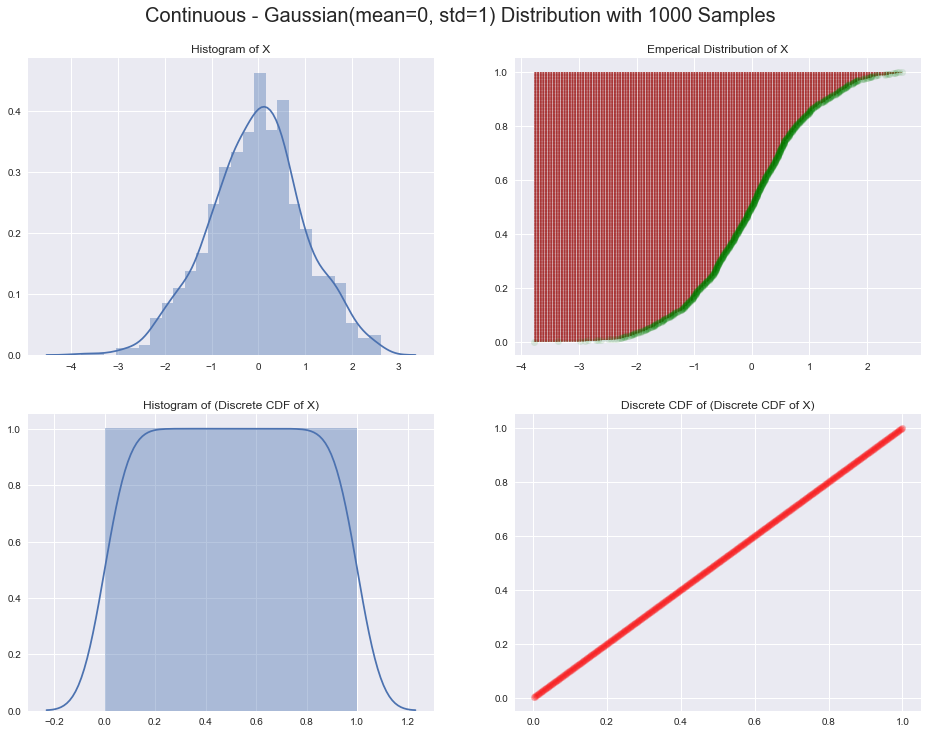

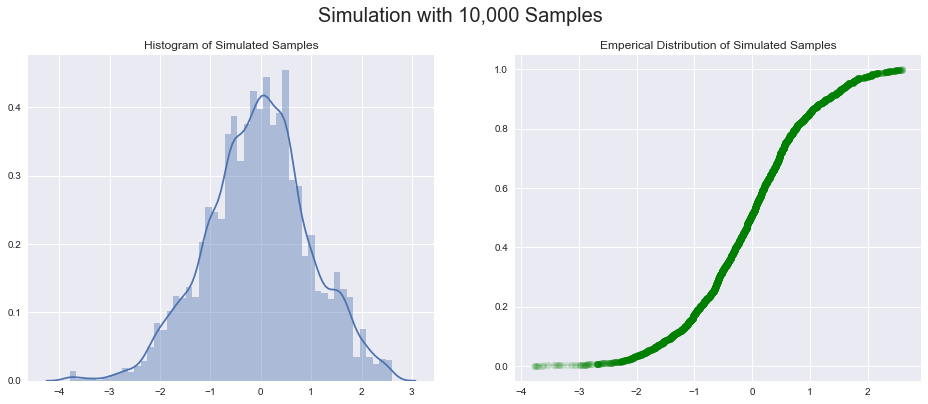

In [3]:
x = np.random.randn(1000)
compare_cdf(x, 'Continuous - Gaussian(mean=0, std=1)', 10000)

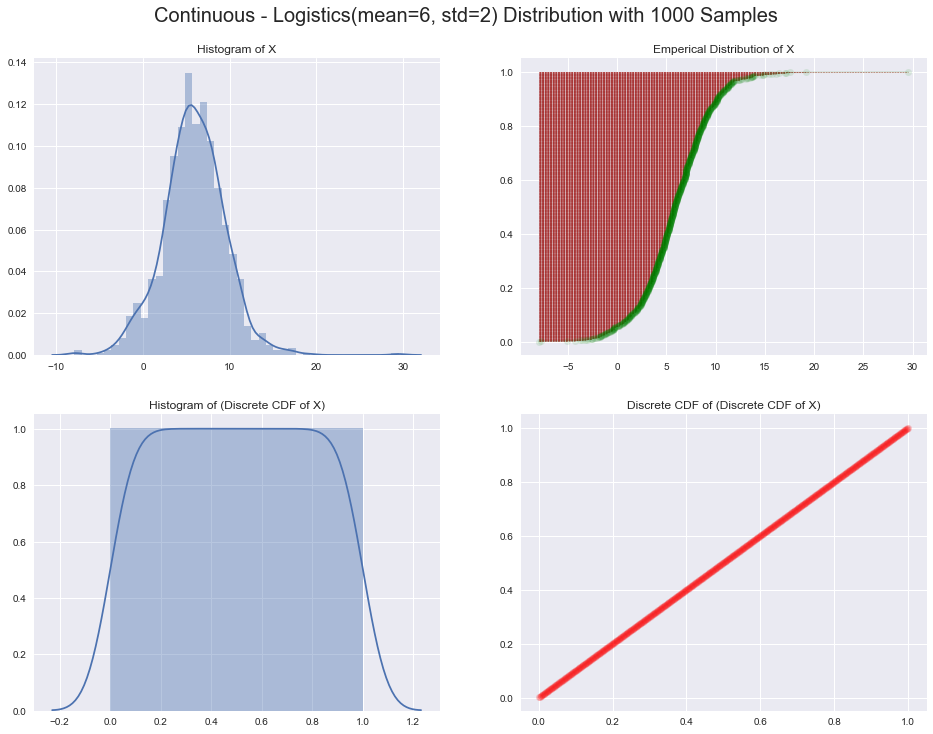

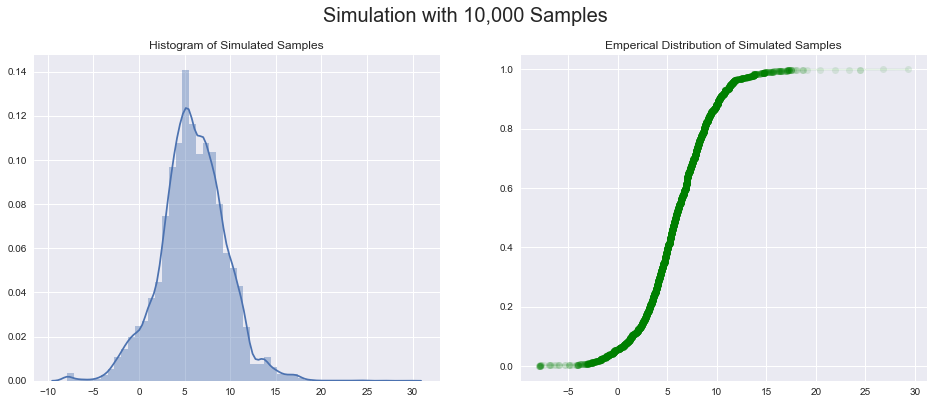

In [4]:
x = np.random.logistic(6, 2, size=1000)
compare_cdf(x, 'Continuous - Logistics(mean=6, std=2)', 10000)

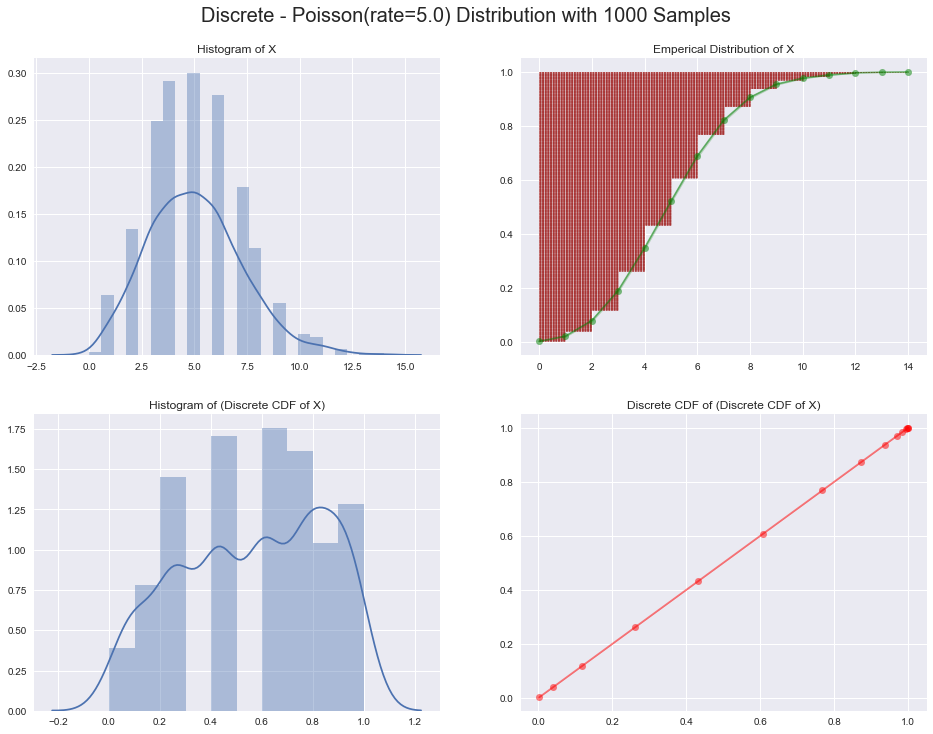

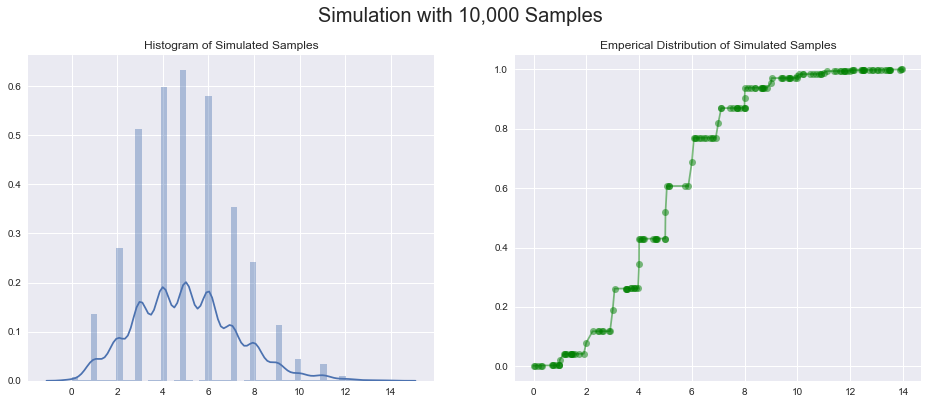

In [5]:
x = np.random.poisson(lam=5, size=1000)
compare_cdf(x, 'Discrete - Poisson(rate=5.0)', 10000, alpha=0.5)

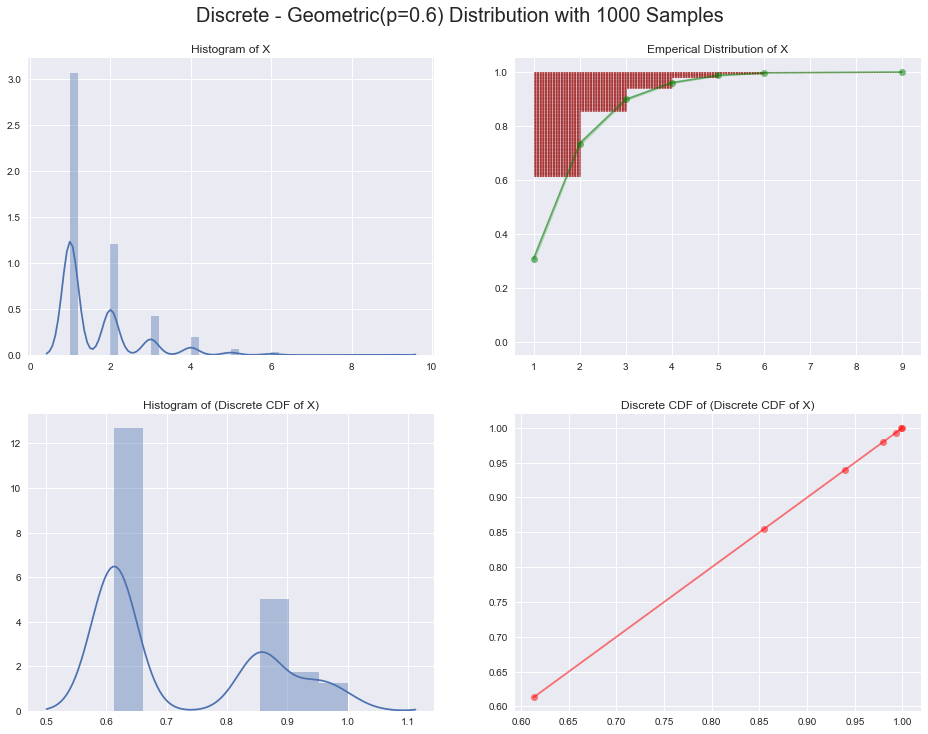

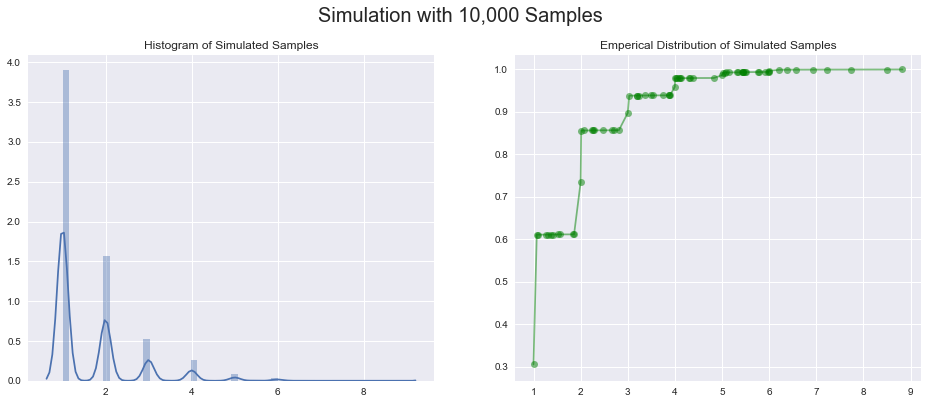

In [6]:
x = np.random.geometric(p=0.6, size=1000)
compare_cdf(x, 'Discrete - Geometric(p=0.6)', 10000, alpha=0.5)

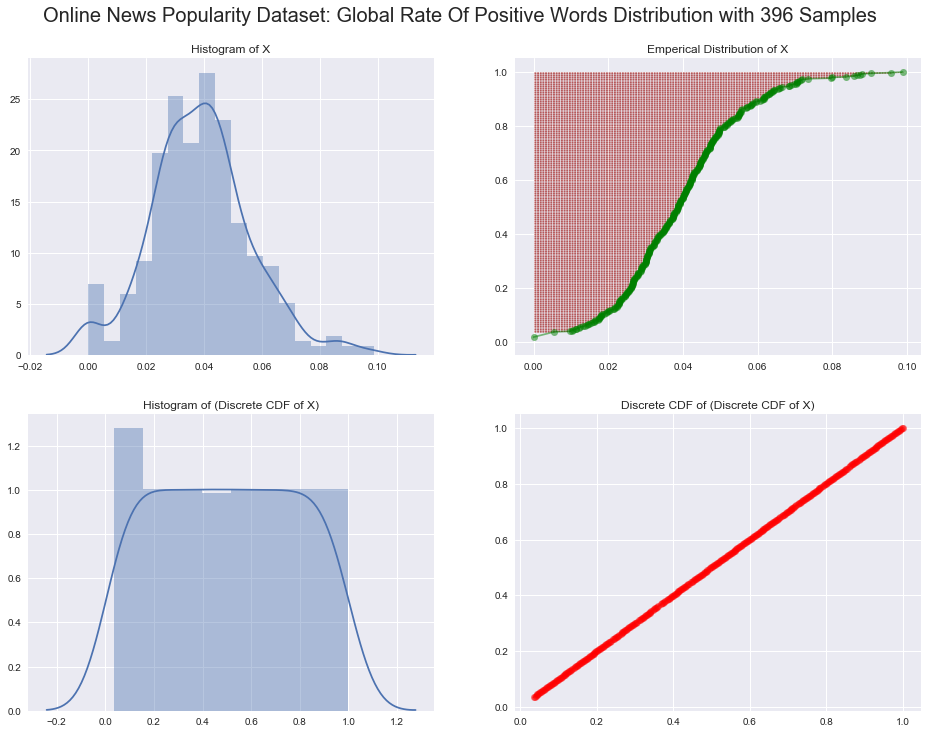

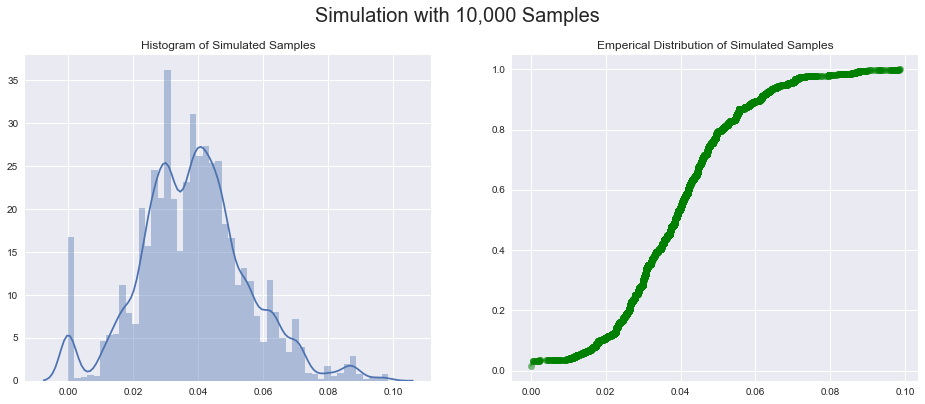

In [7]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df.columns = [col.strip() for col in df.columns]
df = df.sample(frac=0.01)
x = np.array(df['global_rate_positive_words'])
compare_cdf(x, 'Online News Popularity Dataset: Global Rate Of Positive Words', 10000, alpha=0.5)

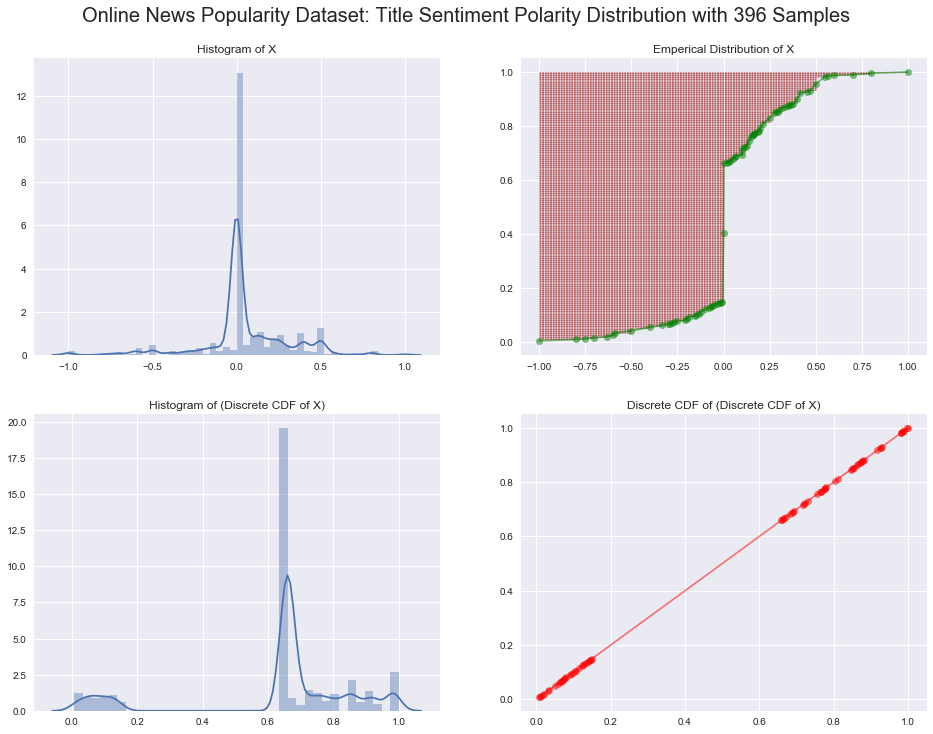

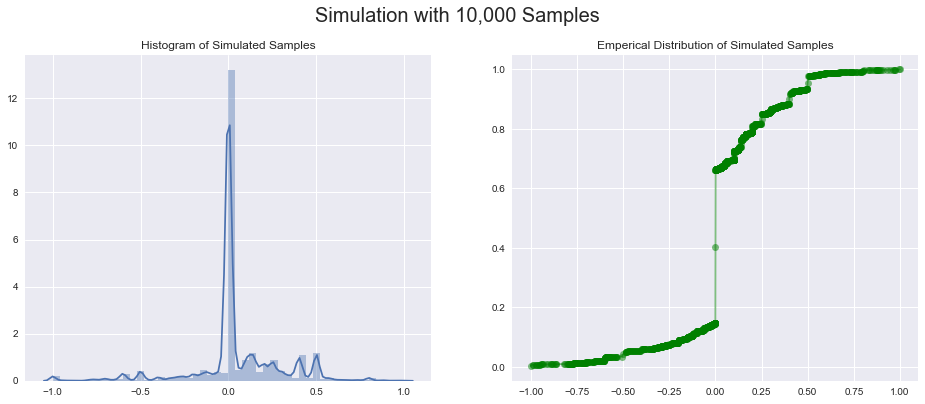

In [8]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df.columns = [col.strip() for col in df.columns]
df = df.sample(frac=0.01)
x = np.array(df['title_sentiment_polarity'])
compare_cdf(x, 'Online News Popularity Dataset: Title Sentiment Polarity', 10000, alpha=0.5)